In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

import utils.plots as plots

In [2]:
plt.rcParams.update({
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

In [3]:
mah_file = f'data/gadgetx3k_20/AHF_History/NewMDCLUSTER_0001_halo_128000000000001.dat'
mah_df = pd.read_csv(mah_file, sep=r'\s+', index_col=False)
mm0 = mah_df['Mvir(4)'].values/mah_df['Mvir(4)'][0]
mm0_star = mah_df['M_star(65)'].values/mah_df['M_star(65)'][0]
mm0_gas = mah_df['M_gas(45)'].values/mah_df['M_gas(45)'][0]

/var/folders/s0/lggtcgss1ybb5pnxffm57clh0000gn/T/ipykernel_6348/381833694.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  mah_df = pd.read_csv(mah_file, sep=r'\s+', index_col=False)


In [4]:
ds_z0 = {}
with open('data/gadgetx3k_20/GadgetX-DS-theory-snap-128.txt') as f:
    for i, x in enumerate(f):
        if i == 0: continue
        if i > 20: break
        k, v = list(map(int,x.split()))
        ds_z0[k] = v
        
state = {0: "Relaxed",
         1: "Disturbed"}

/var/folders/s0/lggtcgss1ybb5pnxffm57clh0000gn/T/ipykernel_6348/1849624679.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  mah_df = pd.read_csv(mah_file, sep=r'\s+', index_col=False)


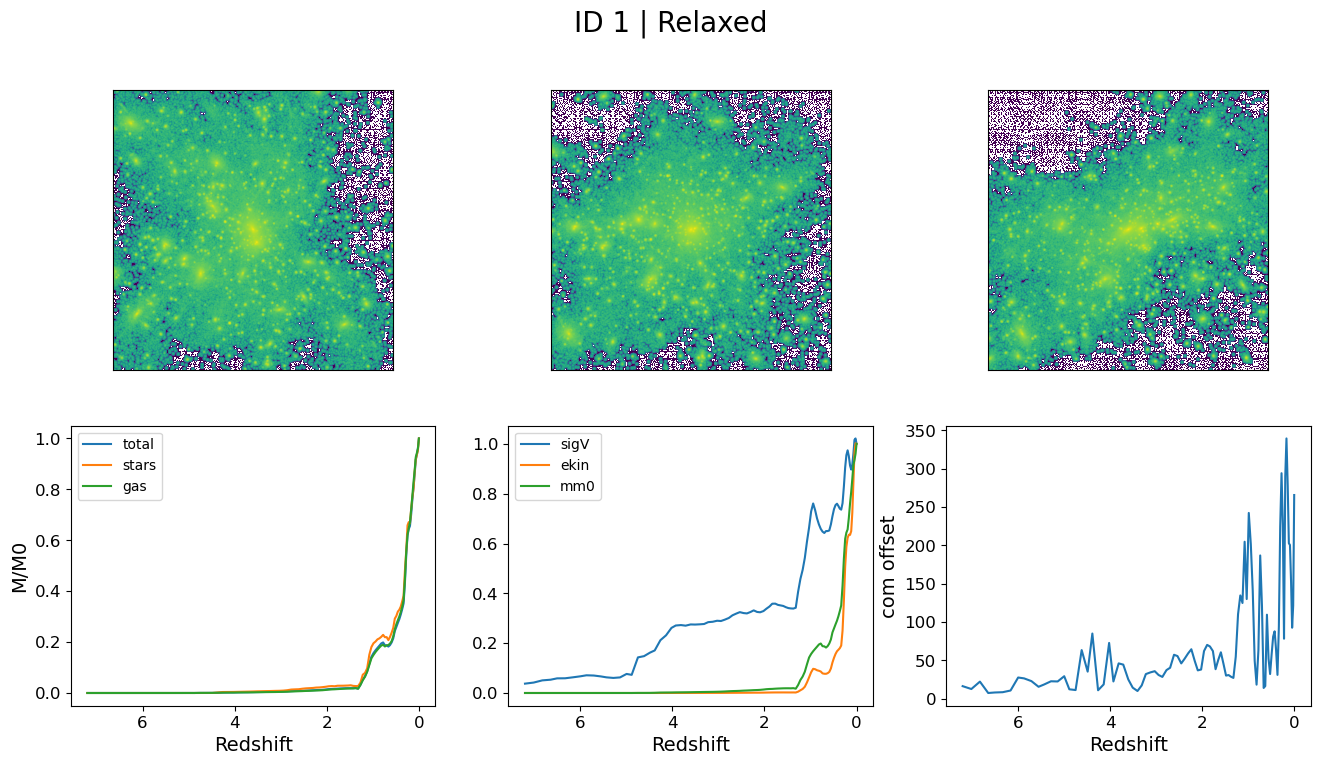

/var/folders/s0/lggtcgss1ybb5pnxffm57clh0000gn/T/ipykernel_6348/1849624679.py:5: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  mah_df = pd.read_csv(mah_file, sep=r'\s+', index_col=False)


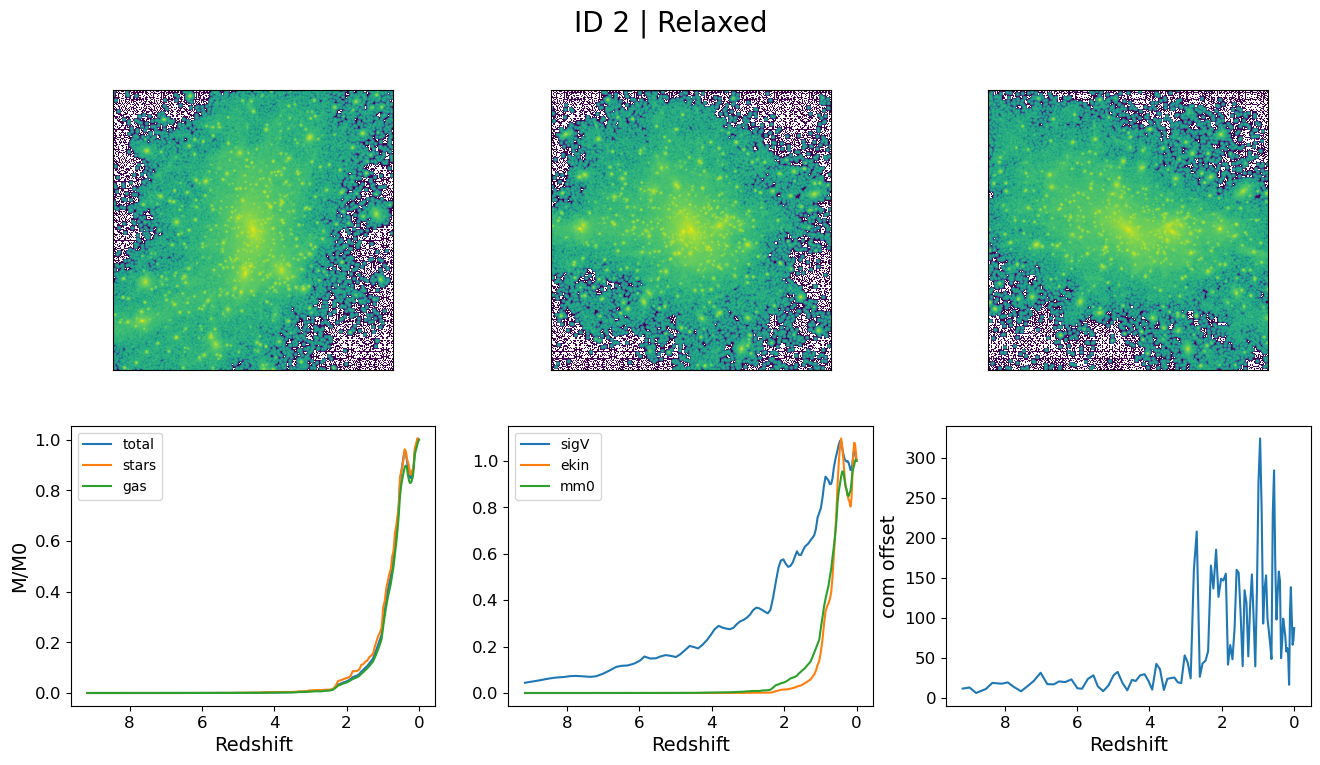

In [6]:
for indx in np.arange(1, 3):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
    fig.suptitle(f'ID {indx} | {state[ds_z0[indx]]}', fontsize=20)
    mah_file = f'data/gadgetx3k_20/AHF_History/NewMDCLUSTER_{str(indx).zfill(4)}_halo_128000000000001.dat'
    mah_df = pd.read_csv(mah_file, sep=r'\s+', index_col=False)

    mm0 = mah_df['Mvir(4)'].values/mah_df['Mvir(4)'][0]
    mm0_star = mah_df['M_star(65)'].values/mah_df['M_star(65)'][0]
    mm0_gas = mah_df['M_gas(45)'].values/mah_df['M_gas(45)'][0]

    com = mah_df[mah_df.columns[16]].values
    ekin = mah_df[mah_df.columns[39]].values/mah_df[mah_df.columns[39]][0]
    sigV = mah_df[mah_df.columns[19]].values/mah_df[mah_df.columns[19]][0]

    for i in range(3):

        img_file = f'data/gadgetx3k_20/bcg_{str(indx).zfill(4)}_125_{str(i)}.fits'
        try:
            hdulist = fits.open(img_file)
        except:
            continue
        img = hdulist[0].data
        plots.display_img(img, axs=axs[0][i])
        axs[0][i].xaxis.set_visible(False)
        axs[0][i].yaxis.set_visible(False)

    axs[1][0].plot(mah_df['Redshift(0)'], mm0, label='total')
    axs[1][0].plot(mah_df['Redshift(0)'], mm0_star, label='stars')
    axs[1][0].plot(mah_df['Redshift(0)'], mm0_gas, label='gas')
    axs[1][0].set_xlabel('Redshift')
    axs[1][0].set_ylabel('M/M0')
    axs[1][0].invert_xaxis()
    axs[1][0].legend()

    axs[1][1].plot(mah_df['Redshift(0)'], sigV, label='sigV')
    axs[1][1].plot(mah_df['Redshift(0)'], ekin, label='ekin')
    axs[1][1].plot(mah_df['Redshift(0)'], mm0, label='mm0')
    axs[1][1].set_xlabel('Redshift')
    axs[1][1].invert_xaxis()
    axs[1][1].legend()

    axs[1][2].plot(mah_df['Redshift(0)'], com)
    axs[1][2].set_xlabel('Redshift')
    axs[1][2].set_ylabel('com offset')
    axs[1][2].invert_xaxis()
    plt.show()

In [58]:
dsdf = pd.read_csv(
    'data/gadgetx3k_20/G3X_progenitors/DS_G3X_snap_075_center-cluster_progenitors.txt',
    sep=r'\s+', header=0)

int_columns = [0, 1, 2, 7] 
column_names = dsdf.columns

for idx in range(len(column_names)):
    col_name = column_names[idx]
    if idx in int_columns:
        dsdf[col_name] = dsdf[col_name].astype(int)
    else:
        dsdf[col_name] = dsdf[col_name].astype(float)

In [59]:
dsdf

,rID[0],Hid[1],DS_200[2],eta_200[3],delta_200[4],fm_200[5],fm2_200[6],DS_500[7],eta_500[8],delta_500[9],fm_500[10],fm2_500[11]
0,1,75000000000002,0,1.145488,0.088237,0.120553,0.043572,0,1.210067,0.052793,1.112438e+09,7.043678e+08
1,2,75000000000000,0,1.377118,0.136708,0.358777,0.118164,0,1.539597,0.165311,2.517891e+09,1.270635e+09
2,3,75000000000004,0,1.147898,0.183782,0.145603,0.085481,0,1.119733,0.203865,1.555580e+09,1.305841e+09
3,4,75000000000003,0,1.156957,0.058082,0.215063,0.062381,0,1.456789,0.059875,2.717622e+09,9.631408e+08
4,5,75000000000010,0,1.232442,0.055832,0.081084,0.046222,0,1.278757,0.104432,1.176764e+09,8.749813e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
319,320,75000000000003,0,1.174404,0.031522,0.056179,0.033474,0,1.227405,0.063844,5.272058e+08,5.022595e+08
320,321,75000000000004,0,1.144384,0.088188,0.151170,0.079591,0,1.198144,0.066704,8.156589e+08,3.507229e+08
321,322,75000000000000,0,1.049801,0.288136,0.360251,0.211575,0,1.190467,0.253467,2.150616e+09,1.321341e+09
322,323,75000000000003,0,2.348500,0.171159,0.136595,0.037287,0,2.187447,0.194820,1.503090e+09,4.756603e+08


In [9]:
dsdf.isna().sum()

rID[0]          0
Hid[1]          0
DS_200[2]       0
eta_200[3]      2
delta_200[4]    0
fm_200[5]       0
fm2_200[6]      0
DS_500[7]       0
eta_500[8]      1
delta_500[9]    0
fm_500[10]      0
fm2_500[11]     0
dtype: int64

In [53]:
mm0[100]

np.float64(2.3484194244134114e-05)